<a href="https://colab.research.google.com/github/zia207/Survival_Analysis_R/blob/main/Colab_Notebook/02_07_05_02_survival_analysis_subdistribution_hazard_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![All-test](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 5.2 Subdistribution Hazard Regression


**Subdistribution Hazard Regression** (also known as the **Fine–Gray model**) is a statistical method for analyzing **competing risks data**—situations where an individual is at risk of experiencing **more than one type of event**, and the occurrence of one event **precludes** the others.

It was introduced by **Fine and Gray (1999)** to directly model the effect of covariates on the **cumulative incidence function (CIF)**, which represents the **absolute risk** (or probability) of experiencing a specific event by time *t*, in the presence of competing events.


In competing risks:

- **Cause-specific hazard (CSH) models** (e.g., `crr()` or `FGR(..., model = "CS")`) model the instantaneous rate of an event **assuming competing events are censored**.
  - Answers: *"What factors influence the biological mechanism or etiology of this event?"*
  
- However, CSH **does not directly translate** to the **absolute risk** (CIF), because a covariate may increase the hazard of the event of interest but *decrease* its cumulative incidence if it strongly increases the risk of a competing event.

The **Fine–Gray model** addresses this by modeling the **subdistribution hazard**, which is constructed so that **proportional hazards on this scale implies proportional CIFs**.



##  Overview


For an event of interest (e.g., cause 1), the **subdistribution hazard** is defined as:

$$
\lambda_1^{SD}(t \mid \mathbf{x}) = \lim_{\Delta t \to 0} \frac{\mathbb{P}(t \leq T \leq t + \Delta t, \text{cause} = 1 \mid T > t \text{ or } (T \leq t \text{ and cause} \neq 1), \mathbf{x})}{\Delta t}
$$

In words:  

> It’s the instantaneous rate of failing from cause 1 at time *t*, **among those who have not yet experienced cause 1**—**including individuals who already failed from a competing cause**.

This is **not a true hazard** (since the risk set includes people who are no longer at risk), but a **"pseudo-hazard"** designed to link directly to the CIF.


Under the **Fine–Gray proportional subdistribution hazards model**:

$$
\lambda_1^{SD}(t \mid \mathbf{x}) = \lambda_{10}^{SD}(t) \exp(\boldsymbol{\beta}^\top \mathbf{x})
$$

Then the **cumulative incidence function** is:

$$
F_1(t \mid \mathbf{x}) = 1 - \left[1 - F_1(t \mid \mathbf{x} = \mathbf{0})\right]^{\exp(\boldsymbol{\beta}^\top \mathbf{x})}
$$

Thus, **covariate effects directly scale the baseline CIF**, making interpretation in terms of **absolute risk differences** more intuitive.




### When to Use Subdistribution Hazard Regression?


Use the **Fine–Gray model** when your goal is:

- **Risk prediction**: estimating *absolute risk* of an event in the presence of competing risks.
- **Clinical decision-making**: e.g., “What is the 5-year risk of cancer recurrence, given that death from other causes is possible?”
- **Public health planning**: understanding population-level burden of specific outcomes.

> Note:  **Do NOT use Fine–Gray for etiologic inference** (e.g., “Does this gene cause the disease?”). For that, use **cause-specific hazards**.



### CSH vs. Fine–Gray


| Feature | Cause-Specific Hazard (CSH) | Subdistribution Hazard (Fine–Gray) |
|--------|----------------------------|-----------------------------------|
| **Risk set** | Only those still event-free | Those not yet failed from **this cause** (includes competing failures) |
| **Models** | Instantaneous event rate | Cumulative incidence (absolute risk) |
| **Use for** | Etiology, biological mechanisms | Risk prediction, clinical prognosis |
| **Interpretation** | “Effect on rate of event” | “Effect on absolute risk of event” |
| **Censoring competing events?** | Yes | No (they remain in risk set) |



##  Subdistribution Hazard Regression for Competing Risks in R


This tutorial demonstrates **Fine-Gray subdistribution hazard modeling** for competing risks using **four modern R packages**:

| Package | Key Functions |
|--------|----------------|
| `cmprsk` | `crr()` – original Fine-Gray implementation |
| `tidycmprsk` | `cuminc()`, `crr()` – tidy + ggplot2 friendly |
| `riskRegression` | `FGR()` – integrates with `predict()` and `CSC()` |
| `prodlim` | `comp.risk()` – non-parametric CIF estimation |

We’ll use the **`Melanoma`** dataset (included in `riskRegression`).



## Setup R in Python Runtype - Install {rpy2}
{rpy2} is a Python package that provides an interface to the R programming language, allowing Python users to run R code, call R functions, and manipulate R objects directly from Python. It enables seamless integration between Python and R, leveraging R's statistical and graphical capabilities while using Python's flexibility. The package supports passing data between the two languages and is widely used for statistical analysis, data visualization, and machine learning tasks that benefit from R's specialized libraries.

In [1]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.5.17
Uninstalling rpy2-3.5.17:
  Successfully uninstalled rpy2-3.5.17
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp312-cp312-linux_x86_64.whl size=316564 sha256=f938c43ba45d302c115b0d693458ecb002c0b9e55c87a414cf27cd1928888d78
  Stored in directory: /root/.cache/pip/wheels/00/26/d5/d5e8c0b039915e785be870270e4a9263e5058168a03513d8cc
Successfully built rpy2


## Mount Google Drive

In [2]:
## Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Install Required R Packages


Following R packages are required to run this notebook. If any of these packages are not installed, you can install them using the code below:


In [3]:
%%R
packages <-c(
		 'tidyverse',
		 'survival',
		 'survminer',
		 'ggsurvfit',
		 'tidycmprsk',
		 'ggfortify',
		 'timereg',
		 'cmprsk',
		 'condSURV',
		 'riskRegression',
		 'prodlim',
		 'lava',
		 'mstate',
		 'regplot',
		 'cmprskcoxmsm'
		 )


### Install missing packages

In [ ]:
%%R
# Install missing packages
new.packages <- packages[!(packages %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')
devtools::install_github("ItziarI/WeDiBaDis", lib='drive/My Drive/R/')


### Verify installation

In [4]:
%%R
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:


  method        from 
  nobs.multinom broom



     tidyverse       survival      survminer      ggsurvfit     tidycmprsk 
          TRUE           TRUE           TRUE           TRUE           TRUE 
     ggfortify        timereg         cmprsk       condSURV riskRegression 
          TRUE           TRUE           TRUE           TRUE           TRUE 
       prodlim           lava         mstate        regplot   cmprskcoxmsm 
          TRUE           TRUE           TRUE           TRUE           TRUE 


### Load Packages

In [5]:
%%R
.libPaths('drive/My Drive/R')
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))

In [6]:
%%R
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])

Successfully loaded packages:
 [1] "package:cmprskcoxmsm"   "package:regplot"        "package:mstate"        
 [4] "package:lava"           "package:prodlim"        "package:riskRegression"
 [7] "package:condSURV"       "package:cmprsk"         "package:timereg"       
[10] "package:ggfortify"      "package:tidycmprsk"     "package:ggsurvfit"     
[13] "package:survminer"      "package:ggpubr"         "package:survival"      
[16] "package:lubridate"      "package:forcats"        "package:stringr"       
[19] "package:dplyr"          "package:purrr"          "package:readr"         
[22] "package:tidyr"          "package:tibble"         "package:ggplot2"       
[25] "package:tidyverse"      "package:tools"          "package:stats"         
[28] "package:graphics"       "package:grDevices"      "package:utils"         
[31] "package:datasets"       "package:methods"        "package:base"          


### Data Preparation


n the period 1962-77, 205 patients with malignant melanoma (cancer of the skin) had a radical operation performed at Odense University Hospital, Denmark. All patients were followed until the end of 1977 by which time 134 were still alive while 71 had died (of out whom 57 had died from cancer and 14 from other causes).

`time`: time in days from operation

`status`: a numeric with values 0=censored 1=death.malignant.melanoma 2=death.other.causes

`event`: a factor with levels censored death.malignant.melanoma death.other.causes

`invasion`: a factor with levels level.0, level.1, level.2

`ici`: inflammatory cell infiltration (IFI): 0, 1, 2 or 3

`epicel`: a factor with levels not present present

`ulcer`: a factor with levels not present present

`thick`: tumour thickness (in 1/100 mm)

`sex`: a factor with levels Female Male

`age`: age at operation (years)

`logthick`: tumour thickness on log-scale




In [7]:
%%R
data(Melanoma, package = "riskRegression")
str(Melanoma)

'data.frame':	205 obs. of  11 variables:
 $ time    : int  10 30 35 99 185 204 210 232 232 279 ...
 $ status  : num  2 2 0 2 1 1 1 1 2 1 ...
 $ event   : Factor w/ 3 levels "censored","death.malignant.melanoma",..: 3 3 1 3 2 2 2 2 3 2 ...
 $ invasion: Factor w/ 3 levels "level.0","level.1",..: 2 1 2 1 3 3 3 3 2 1 ...
 $ ici     : Factor w/ 4 levels "0","1","2","3": 3 1 3 3 3 3 3 3 4 3 ...
 $ epicel  : Factor w/ 2 levels "not present",..: 2 1 1 1 2 1 2 1 1 1 ...
 $ ulcer   : Factor w/ 2 levels "not present",..: 2 1 1 1 2 2 2 2 2 2 ...
 $ thick   : num  6.76 0.65 1.34 2.9 12.08 ...
 $ sex     : Factor w/ 2 levels "Female","Male": 2 2 2 1 2 2 2 2 1 1 ...
 $ age     : int  76 56 41 71 52 28 77 49 60 68 ...
 $ logthick: num  1.911 -0.431 0.293 1.065 2.492 ...




> **Competing risks**:  

> - **Event of interest**: death from melanoma (`status == 1`)  
> - **Competing event**: death from other causes (`status == 2`)




### Non-Parametric CIF Estimation (Baseline)

In [8]:
%%R
# Recode status for clarity
Melanoma <- Melanoma %>%
  mutate(event = case_when(
    status == 1 ~ "Melanoma death",
    status == 2 ~ "Other death",
    status == 0 ~ "Censored"
  ))

# Non-parametric CIF using prodlim
fit_prod <- prodlim(Hist(time, event) ~ 1, data = Melanoma)
summary(fit_prod)

   time          cause n.risk n.event n.lost  cuminc se.cuminc   lower  upper
1    10       Censored    205       0      0 0.00000   0.00000 0.00000 0.0000
2  1513       Censored    155       0      0 0.02439   0.01077 0.00327 0.0455
3  2006       Censored    102       0      0 0.22927   0.02936 0.17172 0.2868
4  3042       Censored     52       0      0 0.42439   0.03452 0.35673 0.4920
5  5565       Censored      1       1      0 0.65366       NaN     NaN    NaN
6    10 Melanoma death    205       0      0 0.00000   0.00000 0.00000 0.0000
7  1513 Melanoma death    155       0      0 0.18049   0.02686 0.12784 0.2331
8  2006 Melanoma death    102       0      0 0.22439   0.02914 0.16728 0.2815
9  3042 Melanoma death     52       0      0 0.26829   0.03095 0.20764 0.3289
10 5565 Melanoma death      1       0      0 0.27805       NaN     NaN    NaN
11   10    Other death    205       1      0 0.00488   0.00487 0.00000 0.0144
12 1513    Other death    155       0      0 0.03902   0.01353 0

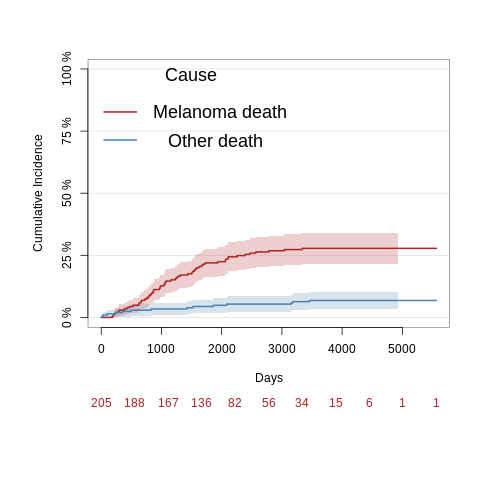

In [9]:
%%R
# Plot cumulative incidence
plot(fit_prod,
     cause = c("Melanoma death", "Other death"),
     atrisk = TRUE,
     col = c("firebrick", "steelblue"),
     lwd = 2,
     xlab = "Days",
     ylab = "Cumulative Incidence",
     legend.title = "Cause")


> Shows **absolute risk** over time without covariates.




### Fine-Gray Model with `cmprsk::crr()`

In [10]:
%%R
# Prepare data
ftime   <- Melanoma$time                # failure/censoring time
fstatus <- Melanoma$status              # 0 = censored, 1 = melanoma, 2 = other
cov     <- Melanoma %>%
  select(age, sex, thick, ulcer) %>%    # keep only the covariates you want
  mutate(
    sex = as.numeric(sex),              # 0/1 → numeric (already is, but be safe)
    ulcer = as.numeric(ulcer)
  )

## any missing values?
any(is.na(ftime))      # FALSE
any(is.na(fstatus))    # FALSE
any(is.na(cov))        # FALSE → if TRUE you must remove/impute rows

# Fit Fine-Gray model for melanoma death (failcode = 1)
fit_crr <- crr(ftime = ftime,
               fstatus = fstatus,
               cov1 = cov,
               failcode = 1,     # cause of interest
               cencode = 0)      # censoring code

summary(fit_crr)

Competing Risks Regression

Call:
crr(ftime = ftime, fstatus = fstatus, cov1 = cov, failcode = 1, 
    cencode = 0)

         coef exp(coef) se(coef)     z p-value
age   0.00593      1.01  0.00929 0.638  0.5200
sex   0.40503      1.50  0.27558 1.470  0.1400
thick 0.08999      1.09  0.03836 2.346  0.0190
ulcer 1.12863      3.09  0.30344 3.719  0.0002

      exp(coef) exp(-coef)  2.5% 97.5%
age        1.01      0.994 0.988  1.02
sex        1.50      0.667 0.874  2.57
thick      1.09      0.914 1.015  1.18
ulcer      3.09      0.323 1.706  5.60

Num. cases = 205
Pseudo Log-likelihood = -268 
Pseudo likelihood ratio test = 35.4  on 4 df,


In [11]:
%%R
# remove all objects from the environment
rm(list = ls())
detach("package:cmprsk", unload = TRUE)

### Fine-Gray with `tidycmprsk` (Tidy + ggplot2)

In [12]:
%%R
# Load data
data(Melanoma, package = "riskRegression")

# Prepare original data
Melanoma <- Melanoma %>%
  filter(complete.cases(.)) %>%
  mutate(
    status_factor = factor(status,
                          levels = c(0, 1, 2),
                          labels = c("censored", "melanoma", "other")),
    profile = "Observed"
  )

In [13]:
%%R
fit_tidy <- tidycmprsk::crr(
  formula  = Surv(time, status_factor) ~ age + sex + thick + ulcer,
  data     = Melanoma,
  failcode = "melanoma"   # use label, not number!
)

# View results
tidy(fit_tidy)

# A tibble: 4 × 5
  term         estimate std.error statistic p.value
  <chr>           <dbl>     <dbl>     <dbl>   <dbl>
1 age           0.00593   0.00929     0.638  0.52  
2 sexMale       0.405     0.276       1.47   0.14  
3 thick         0.0900    0.0384      2.35   0.019 
4 ulcerpresent  1.13      0.303       3.72   0.0002


### Plot CIF for two profiles

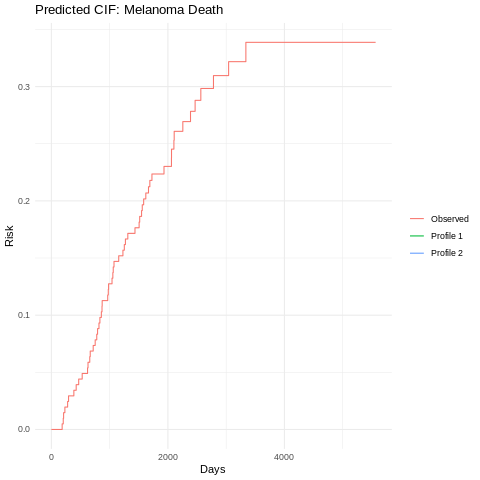

In [14]:
%%R
# Create newdata with EXACT same types
newdata <- tibble(
  time = 0,
  status = 0,
  age = c(50, 50),
  sex = factor(c("M", "M"), levels = c("F", "M")),
  thick = c(1, 6),
  ulcer = factor(c("0", "1"), levels = c("0", "1")),
  status_factor = factor("censored",
                        levels = c("censored", "melanoma", "other")),
  profile = paste("Profile", 1:2)
)

# Combine
plot_df <- bind_rows(Melanoma, newdata)

# Cumulative incidence
cif <- cuminc(
  Surv(time, status_factor) ~ profile,
  data = plot_df
)

# Plot
ggcuminc(cif, outcome = "melanoma") +
  labs(title = "Predicted CIF: Melanoma Death", x = "Days", y = "Risk") +
  theme_minimal()

In [15]:
%%R
# remove all objects from the environment
rm(list = ls())

### Fine-Gray Risk Regression and model validation with {riskRegression} packages

In [24]:
%%R
data(Melanoma, package = "riskRegression")
Melanoma <- Melanoma %>%
  select(time, status, age, sex, thick, ulcer, ici, epicel, invasion) %>%
  filter(complete.cases(.))


#### Split the Data into Training and Testing Sets


The dataset is randomly split into training (80%) and testing (20%) datasets.


In [25]:
%%R
# Set a seed for reproducibility
set.seed(123)
Melanoma$id<-1:nrow(Melanoma)
# Split data into training (80%) and testing (20%) sets
ind.split<-sample(1:nrow(Melanoma),
                  round(nrow(Melanoma)*4/5),
                  replace = F)

# Create training and testing datasets
dftrain <- Melanoma[ind.split, ]
dftest <- Melanoma[-ind.split, ]

#### Cause-specific hazard model versus Fine-Gray model


In this section we examine how covariates influence either the cause-specific hazard function or the cumulative incidence function (CIF) using the cause-specific hazards model or the **Fine-Gray (subdistribution hazard)** model. The cause-specific hazards model provides a hazard ratio that indicates the relative risk of an event given a covariate, but it cannot be directly applied to the cumulative incidence function, which is clinically relevant.

The **Fine-Gray** model addresses this issue by linking the cumulative incidence directly to the estimated subdistribution hazard, allowing regression coefficients to reflect the effects of covariates on cumulative incidence. However, the estimated subdistribution hazard ratio does not have a straightforward clinical interpretation, as it transforms the survival times of subjects who did not experience the event into artificially extended censored times, losing the probabilistic relationship with the marginal survival function.

***Cause-specific Cox proportional hazard regression***

The `CSC()` function is used to fit the cause-specific proportional hazards model, where the first vital status is used as a cause of interest by default. Alternatively, the cause argument can be used to specify a cause of interest.

-   CSC(formula, data, cause, surv.type = "hazard", fitter = "coxph", ...)

Below the `Hist()` function is similar to the `Surv()` function in the {survival} package, which provides functionality for managing censored event history response data


In [26]:
%%R
csc<-CSC(Hist(time, status) ~  age + thick+ulcer, data = dftrain)
csc

CSC(formula = Hist(time, status) ~ age + thick + ulcer, data = dftrain)

Right-censored response of a competing.risks model

No.Observations: 164 

Pattern:
         
Cause     event right.censored
  1          46              0
  2          13              0
  unknown     0            105


----------> Cause:  1 

Call:
coxph(formula = survival::Surv(time, status) ~ age + thick + 
    ulcer, x = TRUE, y = TRUE)

  n= 164, number of events= 46 

                 coef exp(coef) se(coef)     z Pr(>|z|)   
age          0.014982  1.015094 0.009234 1.622   0.1047   
thick        0.111032  1.117431 0.038580 2.878   0.0040 **
ulcerpresent 1.029264  2.799005 0.340378 3.024   0.0025 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

             exp(coef) exp(-coef) lower .95 upper .95
age              1.015     0.9851    0.9969     1.034
thick            1.117     0.8949    1.0361     1.205
ulcerpresent     2.799     0.3573    1.4364     5.454

Concordance= 0.74  (se = 0.03


***Fit the Fine-Gray Model***

`FGR()` function is an interface for fitting the Fine-Gray model and the arguments of the function are similar to that of the CSC() function.


In [27]:
%%R
fgr<- FGR(Hist(time,status)~  age + thick+ulcer, data = dftrain, cause = 1)
fgr


Right-censored response of a competing.risks model

No.Observations: 164 

Pattern:
         
Cause     event right.censored
  1          46              0
  2          13              0
  unknown     0            105


Fine-Gray model: analysis of cause 1 

Competing Risks Regression

Call:
FGR(formula = Hist(time, status) ~ age + thick + ulcer, data = dftrain, 
    cause = 1)

                coef exp(coef) se(coef)     z p-value
age          0.00711      1.01  0.00952 0.746  0.4600
thick        0.09711      1.10  0.03831 2.534  0.0110
ulcerpresent 0.97047      2.64  0.33874 2.865  0.0042

             exp(coef) exp(-coef)  2.5% 97.5%
age               1.01      0.993 0.989  1.03
thick             1.10      0.907 1.022  1.19
ulcerpresent      2.64      0.379 1.359  5.13

Num. cases = 164
Pseudo Log-likelihood = -210 
Pseudo likelihood ratio test = 23.6  on 3 df,

Convergence: TRUE 




A full model (fgr.full) is fitted by using the Fine-Gray model including all seven predictors:


In [28]:
%%R
fgr.full<- FGR(Hist(time,status)~   age + thick+ulcer +ici+epicel+invasion+sex, data = dftrain, cause = 1)
fgr.full


Right-censored response of a competing.risks model

No.Observations: 164 

Pattern:
         
Cause     event right.censored
  1          46              0
  2          13              0
  unknown     0            105


Fine-Gray model: analysis of cause 1 

Competing Risks Regression

Call:
FGR(formula = Hist(time, status) ~ age + thick + ulcer + ici + 
    epicel + invasion + sex, data = dftrain, cause = 1)

                   coef exp(coef) se(coef)      z p-value
age              0.0198     1.020   0.0112  1.769  0.0770
thick            0.0228     1.023   0.0656  0.348  0.7300
ulcerpresent     0.6646     1.944   0.3839  1.731  0.0830
ici1             1.6839     5.387   1.1001  1.531  0.1300
ici2             1.5758     4.835   1.0856  1.452  0.1500
ici3             1.5538     4.729   1.1442  1.358  0.1700
epicelpresent   -1.1913     0.304   0.4065 -2.931  0.0034
invasionlevel.1  0.5023     1.653   0.4149  1.211  0.2300
invasionlevel.2  0.9995     2.717   0.5774  1.731  0.0830
sexMa

#### Prediction


The `predict()` and `predictRisk()` function are similar that both of them estimate the absolute risk at specified time points. The difference is that the former returns covariates that have been used for prediction, whereas the latter only reports the absolute risk.

Following codes will provides the cumulative incidence functions for death from melanoma for the first five individuals in the test dataset over a period of 1,000 to 4,000 days post-operation. To visualize the absolute risk for each individual, you can use the `autoplot()` function.


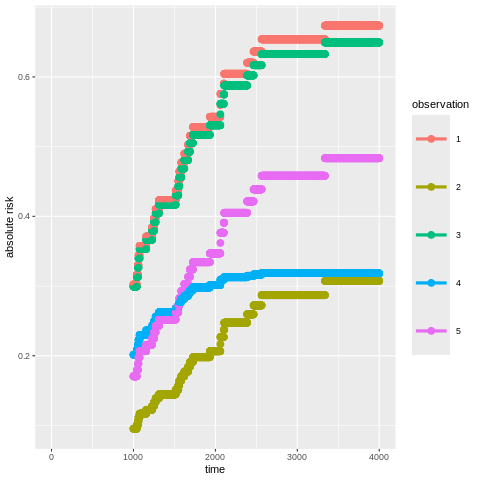

In [29]:
%%R
pred.csc<- predict(csc, newdata = dftest[1:5,], time = 1000:4000, cause = 1)
autoplot(pred.csc)

In [30]:
%%R
predictRisk(csc, newdata=dftest[20,], times =2000)

          [,1]
[1,] 0.3436371


In [31]:
%%R
predictRisk(fgr, newdata=dftest[20,], times =2000)

          [,1]
[1,] 0.3259236



For patient #20, the cumulative incidence estimates for death from melanoma over 2,000 days are 0.34 according to the cause-specific proportional hazards model and 0.32 according to the Fine-Gray model. The discrepancy between the cumulative incidence estimates from the Fine-Gray model and those from the cause-specific hazards models arises from differing assumptions about proportionality—specifically, the Fine-Gray model uses proportional subdistribution hazards, while the Cox regression models utilize proportional cause-specific hazards.


#### Calibration plot


A calibration plot serves as a visual tool for evaluating the accuracy of a predictive model by comparing the predicted probabilities to the observed probabilities at a designated time point. In an ideal scenario, the pairs of observed and predicted probabilities would fall directly along a 45-degree line, known as the line of perfect calibration. This alignment signifies that the model's predictions are reliably matching the actual outcomes. If the points deviate significantly from this line, it suggests that the model may either overestimate or underestimate the probabilities, indicating a need for potential adjustments or improvements. Overall, a well-calibrated model is crucial for making accurate predictions in various applications, particularly in fields like medicine or finance.

The `Score()` function provides a set of methods to score the predictive performance of risk prediction models.


In [32]:
%%R
score<-Score(list(Cox_model = csc,
       Fine_Gray=fgr,
       Full_Fine_Gray =fgr.full),
                       formula = Hist(time, status) ~ 1,
                       data = dftest,
                       times =  seq(2000, 4000, 500),
       plots=c("calibration","ROC"))



The `plotCalibration()` function draws a calibration plot:


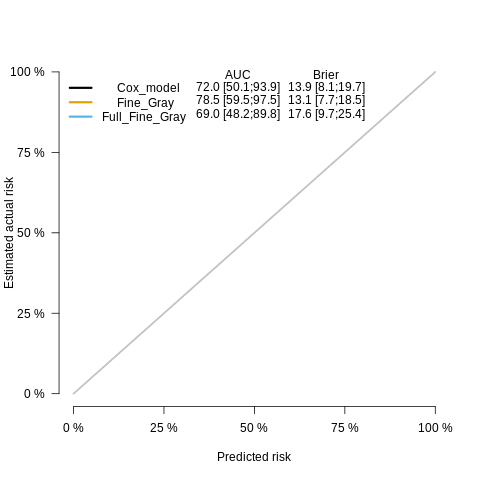

In [33]:
%%R
plotCalibration(score, times =2000, cens.method="jackknife" )


A calibration curve in above figure that is close to the diagonal indicates a better model. The `area under the operating characteristic curve (AUC)` and the `Brier score` are shown at the top of the figure. The `AUC`, also called the `C-index`, measures how well the model can differentiate between outcomes. An `AUC`greater than 0.8 suggests good accuracy.

The `Brier score` measures both how well the model predicts outcomes and how well it is calibrated. It calculates the average squared difference between the actual outcome and the predicted probability. A smaller Brier score means a better model. In our case, the full model has the smallest `AUC` and the largest `Brier` score, indicating it performs poorly.


#### Calibration with cross validation method


A single split into training and test datasets may fail to address the uncertainty of model predictions. Therefore, it's essential to use all available data for both model training and validation. This is why we utilize the cross-validation method. A commonly used approach is `k-fold cross-validation`, which has also been applied to competing risks regression models.

In `k-fold cross-validation`, the original dataset is randomly partitioned into k equal-sized subsamples. One of these $k$ subsamples is reserved as the validation data for testing the model, while the remaining $k−1$ subsamples are used as training data. This process is repeated $k$ times, ensuring that each subsample is used once as the validation data. The results from the k iterations can then be averaged to produce a single estimation. The prediction accuracy can be measured using indices such as the `Area Under the Curve (AUC)` or the `Brier score`.

However, unlike the one-time split method, cross-validation produces $k$ models. The question then arises: which model should be used for prediction? The purpose of cross-validation is not to identify a final model; rather, it serves as a means of model checking to improve prediction accuracy. We do not use the k trained models for actual predictions; instead, we aim to utilize all available data to develop the best possible model.

Cross-validation facilitates the comparison of different model specifications. For example, if we have linear regression models with and without interaction terms, cross-validation can indicate which model performs better in terms of prediction. Once identified, we can train that preferred model using the entire dataset. It's worth noting that while the covariate effects in the linear models may differ across training iterations, the model specification remains consistent. Alternatively, cross-validation can also be employed to build an ensemble model.


In [34]:
%%R
fgr1<- FGR(Hist(time,status)~   age + thick+ulcer, data =Melanoma, cause = 1)
score.cv<-Score(list(
                       Fine_Gray=fgr1),
                       formula = Hist(time, status) ~ 1,
                       data = Melanoma,
                       times =  seq(2000, 4000, 500),
                       split.method = "bootcv",
                       B=10,
                       plots=c("calibration","ROC"))


  |                    |   0%


Attaching package: ‘data.table’



    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year



    between, first, last



    transpose




  |====================| 100%
  |                    |   0%

  |====================| 100%


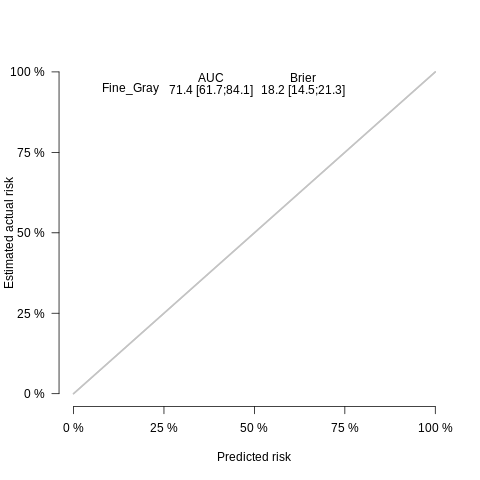

In [35]:
%%R
plotCalibration(score.cv, times =2000, cens.method="jackknife")

#### Bandwidth selection


A smoothed calibration curve can be generated using various smoothing techniques, each of which is influenced by the selection of a bandwidth parameter. The calibration curve's appearance is heavily dependent on this choice. When a larger bandwidth is used, the resulting curve tends to be smooth and flat, leading to greater bias but reduced variance. Conversely, a smaller bandwidth can produce a curve with noticeable fluctuations, which results in lower bias but higher variance. As such, selecting the right bandwidth involves carefully balancing these opposing factors—bias and variance. The following code illustrates how to create calibration curves with varying bandwidths to observe these effects in action.


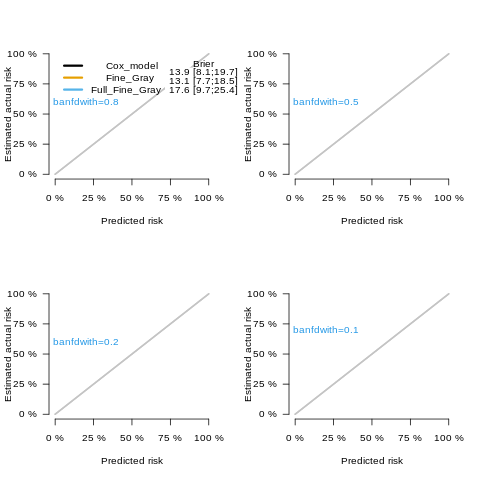

In [36]:
%%R
par(mfrow =c(2,2))
plotCalibration(score, times =seq(2000, 4000, 500),
                bandwith = 0.8,
                auc.in.legend=F,
                cens.method="jackknife",
                btier.in.legend = F,
                legend.x =0, legend.y =1.1)
text(x=0.2, y=0.6, "banfdwith=0.8", col =4)

plotCalibration(score, times =seq(2000, 4000, 500),
                bandwith = 0.5,
                cens.method="jackknife",
                legend = F)
text(x=0.2, y=0.6, "banfdwith=0.5", col =4)

plotCalibration(score, times =seq(2000, 4000, 500),
                bandwith = 0.2,
                cens.method="jackknife",
                legend=F)
text(x=0.2, y=0.6, "banfdwith=0.2", col =4)

plotCalibration(score, times =seq(2000, 4000, 500),
                bandwith = 0.1,
                cens.method="jackknife",
                legend=F)
text(x=0.2, y=0.7, "banfdwith=0.1", col =4)


#### Plotting AUC and Brier score


The `Score()` function calculates all these scores over time and we can easily extract the results for further graphical display.


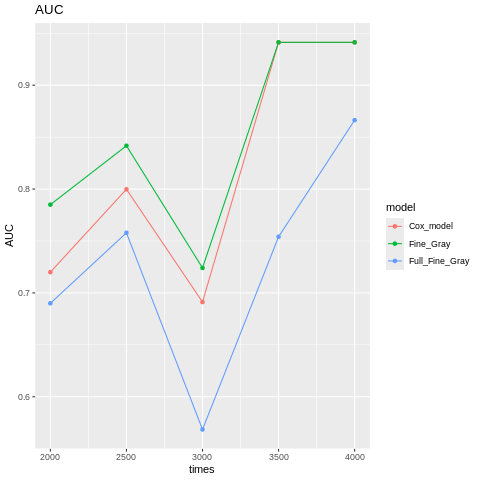

In [37]:
%%R

ggplot(data=score$AUC$score, aes(x=times, y = AUC, color = model)) +
  geom_point() +
  geom_line() +
  ggtitle("AUC")


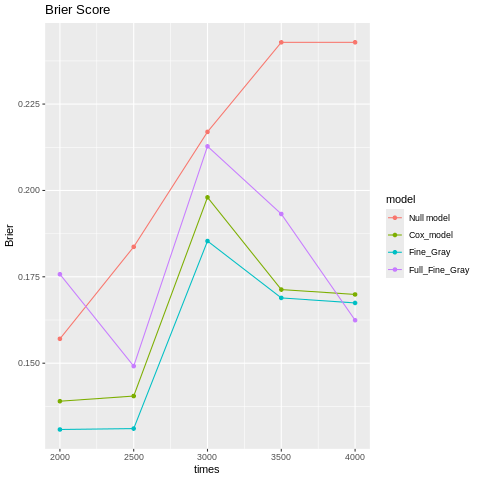

In [38]:
%%R

ggplot(data=score$Brier$score, aes(x=times, y = Brier, color = model)) +
  geom_point() +
  geom_line() +
  ggtitle("Brier Score")


#### Nomogram for visualizing regression models


A `nomogram` is a graphical tool often used in medical and clinical research to predict the probability of a certain outcome or event, such as survival or disease recurrence, based on multiple predictors or covariates. Nomograms provide a visual representation of complex predictive models, making them easier to interpret and apply in a clinical setting.

The `regplot()` function is useful for plotting nomograms with attractive aesthetics. However, it only accepts objects returned by the `coxph`, `lm`, and `glm` functions. To create a nomogram when dealing with competing risks, we first need to construct a weighted dataset for competing risks analysis. We will use `crprep()` function of {mstate} package. This allows us to fit the competing risk model using the `coxph()` function, which can then be passed to `regplot()` to generate the nomogram.


In [39]:
%%R
# created a weighted data set
df.w<-crprep("time", "status",
             data =dftrain, trains=c(1,2),
             cens=0, id="id",
             keep =c("age", "thick", "ulcer"))
head(df.w)

   id Tstart Tstop status weight.cens age thick       ulcer count failcode
1 159      0  3152      0           1  32  1.62 not present     1        1
2 179      0  3459      0           1  29  0.65 not present     1        1
3  14      0   426      1           1  63  4.84     present     1        1
4 195      0  4119      0           1  52  0.65 not present     1        1
5 170      0  3330      0           1  61  0.81     present     1        1
6  50      0  1512      0           1  77  0.16 not present     1        1


In [40]:
%%R
df.w$T<-df.w$Tstop-df.w$Tstart

In [41]:
%%R
# Fine-Gray model is performed with the coxph() function.
f.crr<-coxph(Surv(T, status==1) ~ age + thick + ulcer,
       data = df.w,
       weight = weight.cens,
       subset =failcode ==1)

In [42]:
%%R
# plot namogram
library(regplot)
regplot(f.crr,
        observation = df.w[df.w$id&df.w$failcode==1,],
        failtime= c(2000, 3000),
        prfail=T,
        droplines=T)

[1] "note: points tables not constructed unless points=TRUE "


In [43]:
%%R
# Fit FGR model
fit_fgr <- FGR(Hist(time, status) ~ age + sex + thick + ulcer,
               data = Melanoma,
               cause = 1)

summary(fit_fgr)

Competing Risks Regression

Call:
FGR(formula = Hist(time, status) ~ age + sex + thick + ulcer, 
    data = Melanoma, cause = 1)

                coef exp(coef) se(coef)     z p-value
age          0.00593      1.01  0.00929 0.638  0.5200
sexMale      0.40503      1.50  0.27558 1.470  0.1400
thick        0.08999      1.09  0.03836 2.346  0.0190
ulcerpresent 1.12863      3.09  0.30344 3.719  0.0002

             exp(coef) exp(-coef)  2.5% 97.5%
age               1.01      0.994 0.988  1.02
sexMale           1.50      0.667 0.874  2.57
thick             1.09      0.914 1.015  1.18
ulcerpresent      3.09      0.323 1.706  5.60

Num. cases = 205
Pseudo Log-likelihood = -268 
Pseudo likelihood ratio test = 35.4  on 4 df,



**Same coefficients as `crr()`** – confirms consistency.


### Predict Absolute Risk

In [44]:
%%R
# Define two patient profiles
new_patients <- data.frame(
  age = c(45, 65),
  sex = c(0, 1),
  thick = c(0.8, 4.5),
  ulcer = c(0, 1)
)

# Predict CIF at 5 years (1825 days) and 10 years (3650 days)
pred <- predict(fit_fgr,
                newdata = new_patients,
                times = c(1825, 3650),
                cause = 1)

pred

           [,1]      [,2]
[1,] 0.08105545 0.1326066
[2,] 0.45958341 0.6450363


### Compare Cause-Specific vs Fine-Gray

In [45]:
%%R
# Cause-specific Cox for melanoma death
fit_csc1 <- coxph(Surv(time, status == 1) ~ age + sex + thick + ulcer, data = Melanoma)

# Cause-specific Cox for other death
fit_csc2 <- coxph(Surv(time, status == 2) ~ age + sex + thick + ulcer, data = Melanoma)

# Combine into CSC object
csc <- CSC(
  list(
    melanoma = Hist(time, status) ~ age + sex + thick + ulcer,
    other    = Hist(time, status) ~ age + sex + thick + ulcer
  ),
  data = Melanoma
)
coef(csc)

$`Cause 1`
         age      sexMale        thick ulcerpresent 
  0.01219844   0.43281709   0.10894525   1.16447890 

$`Cause 2`
         age      sexMale        thick ulcerpresent 
  0.07255223   0.35801080   0.04958006   0.10936653 



In [46]:
%%R
new_patients <- tibble(
  age   = c(50, 50),
  sex   = factor(c("Male", "Male"),
                 levels = levels(Melanoma$sex)),          # "Female","Male"
  thick = c(1, 6),
  ulcer = factor(c("not present", "present"),
                 levels = levels(Melanoma$ulcer))        # "not present","present"
)

In [ ]:
%%R
pred_csc <- predict(
  csc,
  newdata = new_patients,
  times   = 1825,
  cause   = 1,                    # melanoma death
  product.limit = TRUE
)

pred_csc

### Plot cumulative incidence for the two profiles

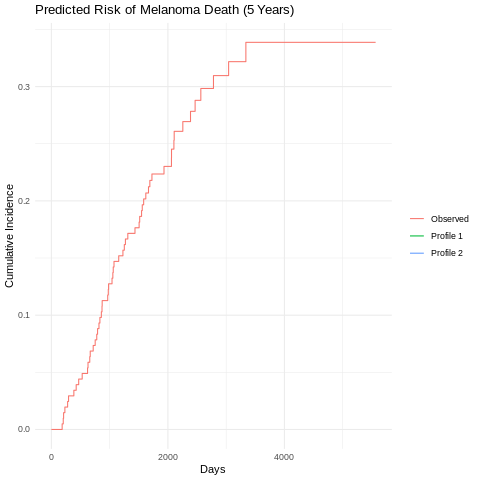

In [47]:
%%R
# Build plot_df

plot_df <- bind_rows(
  Melanoma %>%
    mutate(
      status_factor = factor(
        status,
        levels = c(0, 1, 2),
        labels = c("censored", "melanoma", "other")
      ),
      profile = "Observed"
    ),
  new_patients %>%
    mutate(
      time = 0,
      status = 0,  # keep original numeric if you want, but not used
      status_factor = factor(
        "censored",
        levels = c("censored", "melanoma", "other")
      ),
      profile = paste("Profile", 1:2)
    )
)

# Cumulative incidence
cif <- cuminc(
  Surv(time, status_factor) ~ profile,
  data = plot_df
)

# Plot

ggcuminc(cif, outcome = "melanoma") +
  labs(
    title = "Predicted Risk of Melanoma Death (5 Years)",
    x = "Days", y = "Cumulative Incidence"
  ) +
  theme_minimal()

## Summary and Conclusion


Fine and Gray's subdistribution hazard model is a powerful tool for analyzing competing risks data, allowing for direct modeling of cumulative incidence functions. By using R packages like `cmprsk`, `tidycmprsk`, and `riskRegression`, researchers can effectively estimate and interpret absolute risks in the presence of competing events. This approach is particularly useful for clinical decision-making and public health planning, where understanding the absolute risk of specific outcomes is crucial. This tutorial has provided a comprehensive overview of the Fine-Gray model, its implementation in R, and practical examples using the Melanoma dataset.


## Resources


1. Fine JP, Gray RJ (1999). *A Proportional Hazards Model for the Subdistribution of a Competing Risk*. JASA.
2. `riskRegression` vignette: [https://cran.r-project.org/package=riskRegression](https://cran.r-project.org/package=riskRegression)
3. `tidycmprsk`: [https://mskcc-epi-chevo.github.io/tidycmprsk/](https://mskcc-epi-chevo.github.io/tidycmprsk/)




